# Case Study #1

## 1. Case Study description

Tasks:
* Describe the dataset and any issues with it.
* Generate a minimum of 5 unique visualizations using the data and write a brief description of your observations. Additionally, all attempts should be made to make the visualizations visually appealing
* Create a feature set and create a model which predicts interest_rate using at least 2 algorithms. Describe any data cleansing that must be performed and analysis when examining the data.
* Visualize the test results and propose enhancements to the model, what would you do if you had more time. Also describe assumptions you made and your approach.


## 2. Dataset

**Dataset:** Loan data from Lending Club 
**Url:** https://www.openintro.org/data/index.php?data=loans_full_schema

**Description**  
This data set represents thousands of loans made through the Lending Club platform, which is a platform that allows individuals to lend to other individuals. Of course, not all loans are created equal. Someone who is a essentially a sure bet to pay back a loan will have an easier time getting a loan with a low interest rate than someone who appears to be riskier. And for people who are very risky? They may not even get a loan offer, or they may not have accepted the loan offer due to a high interest rate. It is important to keep that last part in mind, since this data set only represents loans actually made, i.e. do not mistake this data for loan applications! 

 **Variables:**
 
 | Variable | Description |  
 | :- | :- |
 | emp_title | Job title. |  
 | emp_length | Number of years in the job, rounded down. | If longer than 10 years, then this is represented by the value 10. |
 | state | Two-letter state code. |
 | homeownership | The ownership status of the applicant's residence. |
 | annual_income | Annual income. |
 | verified_income | Type of verification of the applicant's income. |
 | debt_to_income | Debt-to-income ratio. |
 | annual_income_joint | If this is a joint application, then the annual income of the two parties applying. |
 | verification_income_joint | Type of verification of the joint income. |
 | debt_to_income_joint | Debt-to-income ratio for the two parties. |
 | delinq_2y | Delinquencies on lines of credit in the last 2 years. |
 | months_since_last_delinq | Months since the last delinquency. |
 | earliest_credit_line | Year of the applicant's earliest line of credit
 | inquiries_last_12m | Inquiries into the applicant's credit during the last 12 months. |
 | total_credit_lines | Total number of credit lines in this applicant's credit history. |
 | open_credit_lines | Number of currently open lines of credit. |
 | total_credit_limit | Total available credit, e. |g. | if only credit cards, then the total of all the credit limits. | This excludes a mortgage. |
 | total_credit_utilized | Total credit balance, excluding a mortgage. |
 | num_collections_last_12m | Number of collections in the last 12 months. | This excludes medical collections. |
 | num_historical_failed_to_pay | The number of derogatory public records, which roughly means the number of times the applicant failed to pay. |
 | months_since_90d_late | Months since the last time the applicant was 90 days late on a payment. |
 | current_accounts_delinq | Number of accounts where the applicant is currently delinquent. |
 | total_collection_amount_ever | The total amount that the applicant has had against them in collections. |
 | current_installment_accounts | Number of installment accounts, which are (roughly) accounts with a fixed payment amount and period. | A typical example might be a 36-month car loan. |
 | accounts_opened_24m | Number of new lines of credit opened in the last 24 months. |
 | months_since_last_credit_inquiry | Number of months since the last credit inquiry on this applicant. |
 | num_satisfactory_accounts | Number of satisfactory accounts. |
 | num_accounts_120d_past_due | Number of current accounts that are 120 days past due. |
 | num_accounts_30d_past_due | Number of current accounts that are 30 days past due. |
 | num_active_debit_accounts | Number of currently active bank cards. |
 | total_debit_limit | Total of all bank card limits. |
 | num_total_cc_accounts | Total number of credit card accounts in the applicant's history. |
 | num_open_cc_accounts | Total number of currently open credit card accounts. |
 | num_cc_carrying_balance | Number of credit cards that are carrying a balance. |
 | num_mort_accounts | Number of mortgage accounts. |
 | account_never_delinq_percent | Percent of all lines of credit where the applicant was never delinquent. |
 | tax_liens | a numeric vector
 | public_record_bankrupt | Number of bankruptcies listed in the public record for this applicant. |
 | loan_purpose | The category for the purpose of the loan. |
 | application_type | The type of application: either individual or joint. |
 | loan_amount | The amount of the loan the applicant received. |
 | term | The number of months of the loan the applicant received. |
 | interest_rate | Interest rate of the loan the applicant received. |
 | installment | Monthly payment for the loan the applicant received. |
 | grade | Grade associated with the loan. |
 | sub_grade | Detailed grade associated with the loan. |
 | issue_month | Month the loan was issued. |
 | loan_status | Status of the loan. |
 | initial_listing_status | Initial listing status of the loan. | (I think this has to do with whether the lender provided the entire loan or if the loan is across multiple lenders. |)
 | disbursement_method | Dispersement method of the loan. |
 | balance | Current balance on the loan. |
 | paid_total | Total that has been paid on the loan by the applicant. |
 | paid_principal | The difference between the original loan amount and the current balance on the loan. |
 | paid_interest | The amount of interest paid so far by the applicant. |
 | paid_late_fees | Late fees paid by the applicant. |


## 3. Analysis

### 3.1 Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, BayesianRidge, LogisticRegression
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 3.2 Data Exploration

We will load the dataset into a pandas dataframe.

In [3]:
filename = 'loans_full_schema.csv'
df = pd.read_csv(filename, sep=',')

In [4]:
df.head(n=10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0,0,other,individual,5000,36,6.72,153.75,A,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,0,NaN,2004,1,12,10,291852,18916,0,0,NaN,0,0,2,1,9.0,10,0.0,0,3,9100,8,7,6,2,100.0,0,0,credit_card,joint,24000,60,13.59,553.35,C,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,1,19.0,2005,1,30,15,342336,60805,0,0,71.0,0,0,2,4,7.0,15,NaN,0,5,22250,16,12,10,7,93.0,0,0,debt_consolidation,individual,20000,60,11.99,444.79,B,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,1,18.0,1998,3,35,21,283190,69561,0,0,18.0,0,0,6,10,4.0,21,0.0,0,11,36700,19,14,14,2,97.1,0,0,home_improvement,individual,20000,36,13.59,679.58,C,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,0,NaN,2001,0,9,6,33114,17768,0,0,NaN,0,0,1,5,17.0,6,0.0,0,3,14700,7,5,3,0,100.0,0,0,credit_card,individual,6400,36,6.71,196.77,A,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


In [5]:
print(f"The dataset has {df.shape[0]} entries with {df.shape[1]} variables each.")

The dataset has 10000 entries with 55 variables each.


In [6]:
print("The datase includes the following variables:")
print(df.dtypes)

The datase includes the following variables:
emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq        

### 3.2.1 Variables

The dataset cobtains both numeric and categorical variables. 

In [7]:
numeric_columns = df._get_numeric_data().columns
categorical_columns = list(set(df.columns) - set(numeric_columns))
print(f"The dataset contains {len(df.columns)} variables. In particular, it contains: \n- {len(numeric_columns)} numeric variables, and \n- {len(categorical_columns)} categorical variables.")

The dataset contains 55 variables. In particular, it contains: 
- 42 numeric variables, and 
- 13 categorical variables.


#### Numeric Variables

In [8]:
print(f"The data consists of {len(numeric_columns)} numeric variables.")
print(f"Numeric Variables: \n{', '.join(numeric_columns)}")

The data consists of 42 numeric variables.
Numeric Variables: 
emp_length, annual_income, debt_to_income, annual_income_joint, debt_to_income_joint, delinq_2y, months_since_last_delinq, earliest_credit_line, inquiries_last_12m, total_credit_lines, open_credit_lines, total_credit_limit, total_credit_utilized, num_collections_last_12m, num_historical_failed_to_pay, months_since_90d_late, current_accounts_delinq, total_collection_amount_ever, current_installment_accounts, accounts_opened_24m, months_since_last_credit_inquiry, num_satisfactory_accounts, num_accounts_120d_past_due, num_accounts_30d_past_due, num_active_debit_accounts, total_debit_limit, num_total_cc_accounts, num_open_cc_accounts, num_cc_carrying_balance, num_mort_accounts, account_never_delinq_percent, tax_liens, public_record_bankrupt, loan_amount, term, interest_rate, installment, balance, paid_total, paid_principal, paid_interest, paid_late_fees


The statistics for the numerical variables are shown in the following table.

In [9]:
df[numeric_columns].describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,2285.000000,10000.0000,10000.000000,10000.000000,10000.000000,8729.000000,10000.000000,9682.0,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,11.40440,1.836062e+05,51049.063100,0.013800,0.167100,46.112473,0.0001,184.334000,2.663600,4.376100,7.340703,11.379600,0.0,0.0001,3.595300,27357.410300,13.030000,8.095000,5.230500,1.383100,94.648990,0.043300,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,5.86828,1.876327e+05,53636.731172,0.126535,0.687768,21.748021,0.0100,2206.389859,2.935387,3.158583,5.981590,5.859705,0.0,0.0100,2.434689,26570.164081,7.874713,4.906606,3.327623,1.717274,9.155059,0.593852,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,2.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,14.300000,0.000000,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,7.00000,5.159375e+04,19185.500000,0.000000,0.000000,29.000000,0.0000,0.000000,1.000000,2.000000,2.000000,7.000000,0.0,0.0000,2.000000,10000.000000,7.000000,5.000000,3.000000,0.000000,92.600000,0.000000,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,10.00000,1.146670e+05,36927.000000,0.000000,0.000000,47.000000,0.0000,0.000000,2.000000,4.000000,6.000000,10.000000,0.0,0.0000,3.000000,19500.000000,11.000000,7.000000,5.000000,1.000000,100.000000,0.000000,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,14.00000,2.675500e+05,65421.000000,0.000000,0.000000,63.000000,0.0000,0.000000,3.000000,6.000000,11.000000,14.000000,0.0,0.0000,5.000000,36100.000000,17.000000,10.000000,7.000000,2.000000,100.000000,0.000000,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,51.00000,3.386034e+06,942456.000000,3.000000,52.

#### Categorical Variables

In [10]:
print(f"The data consists of {len(categorical_columns)} categorical variables.")
print(f"Categorical Variables: \n{', '.join(categorical_columns)}")

The data consists of 13 categorical variables.
Categorical Variables: 
state, initial_listing_status, application_type, homeownership, disbursement_method, loan_purpose, emp_title, verification_income_joint, verified_income, grade, loan_status, sub_grade, issue_month


The statistics for the categorical variables are shown in the following table.

In [11]:
df[categorical_columns].describe(include='all')

,state,initial_listing_status,application_type,homeownership,disbursement_method,loan_purpose,emp_title,verification_income_joint,verified_income,grade,loan_status,sub_grade,issue_month
count,10000,10000,10000,10000,10000,10000,9167,1455,10000,10000,10000,10000,10000
unique,50,2,2,3,2,12,4741,3,3,7,6,32,3
top,CA,whole,individual,MORTGAGE,Cash,debt_consolidation,manager,Not Verified,Source Verified,B,Current,B1,Mar-2018
freq,1330,8206,8505,4789,9284,5144,218,611,4116,3037,9375,647,3617


## 3.3 Data Preprocessing

In this step, we will look in more depth into our dataset. We will check for:  
- Missing NaN values
- Duplicated rows  
- Outliers  
- Mismatch data

### 3.3.1 Missing Values

In this step, we will deal with the NaN values of the dataset. 

In [12]:
cols_with_nan = df.isnull().sum()
nan_columns = cols_with_nan.loc[cols_with_nan > 0].index.tolist()
cols_with_nan = cols_with_nan[nan_columns]
print("The columns of the dataset with NaN values are the following: ")
print(cols_with_nan)

The columns of the dataset with NaN values are the following: 
emp_title                            833
emp_length                           817
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
months_since_last_delinq            5658
months_since_90d_late               7715
months_since_last_credit_inquiry    1271
num_accounts_120d_past_due           318
dtype: int64


#### Handling Categorical Variables

In [13]:
categorical_nan_columns = list(set(nan_columns).intersection(set(categorical_columns)))
print(f"The categorical variables with missing values are: \n{', '.join(categorical_nan_columns)}")

The categorical variables with missing values are: 
emp_title, verification_income_joint


In the following table, there are the summary of the categorical variables with missing values.
* The "emp_title" variable is empty when the employer job's title is missing or individual is unemployed.
* The "verification_income_joint" variable is empty when the application was submitted by one person (application type as individual) or the information is missing. 

In [14]:
df[categorical_nan_columns].describe()

,emp_title,verification_income_joint
count,9167,1455
unique,4741,3
top,manager,Not Verified
freq,218,611


In [15]:
df['verification_income_joint'].value_counts(dropna=False)

NaN                8545
Not Verified        611
Source Verified     499
Verified            345
Name: verification_income_joint, dtype: int64

In [16]:
df[['verification_income_joint','application_type']].value_counts(dropna=False)

verification_income_joint  application_type
NaN                        individual          8505
Not Verified               joint                611
Source Verified            joint                499
Verified                   joint                345
NaN                        joint                 40
dtype: int64

We will handle the two variables accordingly:
* emp_title: We replace it with "Not Provided" if person has declared non-zero annual income. Otherwise, the value will be set as "Unemployed".
* verification_income_joint: The NaN values will be replaced with "Not Verified" when the application is joint.

In [17]:
df['verification_income_joint'] = np.where((df['verification_income_joint'].isnull()) & (df['application_type'] == 'joint'), "Not Verified", df['verification_income_joint'])
df['emp_title'] = np.where((df['emp_title'].isnull()) & (df['annual_income'] > 0), "Not Provided", df['emp_title'])
df['emp_title'] = np.where((df['emp_title'].isnull()) & (df['annual_income'] == 0), "Unemployed", df['emp_title'])

In the following table, we can see that the combination NaN in verification_income_joint and joint in application_type does not exist anymore.

In [18]:
df[['verification_income_joint','application_type']].value_counts(dropna=False)

verification_income_joint  application_type
NaN                        individual          8505
Not Verified               joint                651
Source Verified            joint                499
Verified                   joint                345
dtype: int64

The summary for the categorical variables after processing are shown in the next table.

In [19]:
df[categorical_nan_columns].describe()

,emp_title,verification_income_joint
count,10000,1495
unique,4743,3
top,Not Provided,Not Verified
freq,811,651


#### Handling Numerical Variables

In [20]:
numeric_nan_columns = list(set(nan_columns).intersection(set(numeric_columns)))
print(f"Numerical variables with missing values: \n{', '.join(numeric_nan_columns)}")

Numerical variables with missing values: 
debt_to_income, num_accounts_120d_past_due, debt_to_income_joint, annual_income_joint, months_since_90d_late, emp_length, months_since_last_credit_inquiry, months_since_last_delinq


In [21]:
df[numeric_nan_columns].describe()

,debt_to_income,num_accounts_120d_past_due,debt_to_income_joint,annual_income_joint,months_since_90d_late,emp_length,months_since_last_credit_inquiry,months_since_last_delinq
count,9976.000000,9682.0,1495.000000,1.495000e+03,2285.000000,9183.000000,8729.000000,4342.000000
mean,19.308192,0.0,19.979304,1.279146e+05,46.112473,5.930306,7.340703,36.760709
std,15.004851,0.0,8.054781,7.016838e+04,21.748021,3.703734,5.981590,21.634939
min,0.000000,0.0,0.320000,1.920000e+04,2.000000,0.000000,0.000000,1.000000
25%,11.057500,0.0,14.160000,8.683350e+04,29.000000,2.000000,2.000000,19.000000
50%,17.570000,0.0,19.720000,1.130000e+05,47.000000,6.000000,6.000000,34.000000
75%,25.002500,0.0,25.500000,1.515455e+05,63.000000,10.000000,11.000000,53.000000
max,469.090000,0.0,39.980000,1.100000e+06,128.000000,10.000000,24.000000,118.000000


#### Variable "emp_length"

In [22]:
%%capture --no-stdout
print(df[['emp_length','emp_title']][df['emp_length'].isnull()][df['emp_title'] == 'Not Provided'].value_counts(dropna=False))
print(df[['emp_length','emp_title']][df['emp_length'].isnull()][df['emp_title'] == 'Unemployed'].value_counts(dropna=False))

emp_length  emp_title   
NaN         Not Provided    795
dtype: int64
emp_length  emp_title 
NaN         Unemployed    22
dtype: int64


We will handle the emp_length variable in the following way based on the emp_title variable:
* emp_title is "Not Provided": Do Nothing.
* emp_title is "Unemployed": the emp_length value will be replaced with zero.

In [23]:
df['emp_length'] = np.where((df['emp_length'].isnull()) & (df['emp_title'] == "Unemployed"), 0.0, df['emp_length'])
df['emp_length'] = np.where((df['emp_length'].isnull()) & (df['emp_title'] == "Not Provided"), df['emp_length'], df['emp_length'])

In [24]:
%%capture --no-stdout
print(df[['emp_length','emp_title']][df['emp_length'].isnull()][df['emp_title'] == 'Not Provided'].value_counts(dropna=False))
print(df[['emp_length','emp_title']][df['emp_length'].isnull()][df['emp_title'] == 'Unemployed'].value_counts(dropna=False))

emp_length  emp_title   
NaN         Not Provided    795
dtype: int64
Series([], dtype: int64)


#### Variables "annual_income_joint" & "debt_to_income_joint"

In [25]:
%%capture --no-stdout
print(df[['annual_income_joint','debt_to_income_joint', 'application_type']][df['annual_income_joint'].isnull()][df['debt_to_income_joint'].isnull()].value_counts(dropna=False))

annual_income_joint  debt_to_income_joint  application_type
NaN                  NaN                   individual          8505
dtype: int64


The missing values for the above variables are referring only to the individual applications. There is no need for further examination.

#### Variable "debt_to_income"

In [26]:
%%capture --no-stdout
print(df[['debt_to_income', 'annual_income']][df['debt_to_income'].isnull()].value_counts(dropna=False))
df['debt_to_income'] = np.where(df['debt_to_income'].isnull(), 0.0, df['debt_to_income'])

debt_to_income  annual_income
NaN             0.0              23
                1.0               1
dtype: int64


We replaced the missing values with zeros.

#### Other Variables 
* The columns "months_since_last_delinq" & "months_since_90d_late" & "months_since_last_credit_inquiry" will not be used, since a large percentage of their values are NaN.
* The variable num_accounts_120d_past_due will not be used, since all non missing values are zeros.

In [27]:
not_used_columns = ["months_since_last_delinq", "months_since_90d_late", "months_since_last_credit_inquiry", "num_accounts_120d_past_due"]

In [28]:
df['num_accounts_120d_past_due'].sum()

0.0

### 3.3.2 Duplicated Rows

In [29]:
print(f"The dataset contains {len(df[df.duplicated()])} duplicates rows.")

The dataset contains 0 duplicates rows.


### 3.3.3 Handling Outliers

We will ignore the variables 

In [30]:
to_be_analysed = []
ignore_columns = ['emp_length', 'annual_income_joint', 'debt_to_income_joint', 'annual_income', 'debt_to_income']
max_threshold = 8000
min_threshold = 2000

df_filtered = df

In [31]:
for col in numeric_columns:
    if col in not_used_columns or col in ignore_columns:
        continue
        
    q_low = df[col].quantile(0.01)
    q_hi  = df[col].quantile(0.99)

    df_filtered = df[(df[col] < q_hi) & (df[col] > q_low)]
    
    if df_filtered.shape[0] > max_threshold:
        continue
    elif df_filtered.shape[0] <= max_threshold:
        not_used_columns.append(col)
        continue
    else:
        to_be_analysed.append(col)
        print(f"{col}: next shape {df_filtered.shape}")
    
    

In [32]:
print(f"The following Variables will not be used due to their distribution: \n\n{', '.join(not_used_columns)}")
print()
updated_columns = set(df.columns)-set(not_used_columns)
print(f"The updated Variables are: \n\n{', '.join(updated_columns)}")

The following Variables will not be used due to their distribution: 

months_since_last_delinq, months_since_90d_late, months_since_last_credit_inquiry, num_accounts_120d_past_due, delinq_2y, inquiries_last_12m, num_collections_last_12m, num_historical_failed_to_pay, current_accounts_delinq, total_collection_amount_ever, num_accounts_30d_past_due, num_mort_accounts, account_never_delinq_percent, tax_liens, public_record_bankrupt, term, paid_late_fees

The updated Variables are: 

debt_to_income, open_credit_lines, application_type, annual_income, loan_purpose, current_installment_accounts, emp_title, verification_income_joint, num_active_debit_accounts, emp_length, total_credit_utilized, total_credit_lines, initial_listing_status, debt_to_income_joint, total_debit_limit, installment, annual_income_joint, interest_rate, verified_income, accounts_opened_24m, sub_grade, loan_amount, num_open_cc_accounts, num_total_cc_accounts, grade, paid_interest, total_credit_limit, balance, paid_total,

In [33]:
df[updated_columns].describe()

,debt_to_income,open_credit_lines,annual_income,current_installment_accounts,num_active_debit_accounts,emp_length,total_credit_utilized,total_credit_lines,debt_to_income_joint,total_debit_limit,installment,annual_income_joint,interest_rate,accounts_opened_24m,loan_amount,num_open_cc_accounts,num_total_cc_accounts,paid_interest,total_credit_limit,balance,paid_total,num_satisfactory_accounts,num_cc_carrying_balance,paid_principal,earliest_credit_line
count,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,9205.000000,10000.000000,10000.000000,1495.000000,10000.000000,10000.000000,1.495000e+03,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,19.261852,11.40440,7.922215e+04,2.663600,3.595300,5.916133,51049.063100,22.679600,19.979304,27357.410300,476.205323,1.279146e+05,12.427524,4.376100,16361.922500,8.095000,13.030000,599.666781,1.836062e+05,14458.916610,2494.234773,11.379600,5.230500,1894.448466,2001.29000
std,15.016585,5.86828,6.473429e+04,2.935387,2.434689,3.710622,53636.731172,11.885439,8.054781,26570.164081,294.851627,7.016838e+04,5.001105,3.158583,10301.956759,4.906606,7.874713,517.328062,1.876327e+05,9964.561865,3958.230365,5.859705,3.327623,3884.407175,7.79551
min,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000,0.320000,0.000000,30.750000,1.920000e+04,5.310000,0.000000,1000.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1963.00000
25%,10.997500,7.00000,4.500000e+04,1.000000,2.000000,2.000000,19185.500000,14.000000,14.160000,10000.000000,256.040000,8.683350e+04,9.430000,2.000000,8000.000000,5.000000,7.000000,221.757500,5.159375e+04,6679.065000,928.700000,7.000000,3.000000,587.100000,1997.00000
50%,17.530000,10.00000,6.500000e+04,2.000000,3.000000,6.000000,36927.000000,21.000000,19.720000,19500.000000,398.420000,1.130000e+05,11.980000,4.000000,14500.000000,7.000000,11.000000,446.140000,1.146670e+05,12379.495000,1563.300000,10.000000,5.000000,984.990000,2003.00000
75%,24.990000,14.00000,9.500000e+04,3.000000,5.000000,10.000000,65421.000000,29.000000,25.500000,36100.000000,644.690000,1.515455e+05,15.050000,6.000000,24000.000000,10.000000,17.000000,825.420000,2.675500e+05,20690.182500,2616.005000,14.000000,7.000000,1694.555000,2006.00000
max,469.090000,51.00000,2.300000e+06,35.000000,32.000000,10.000000,942456.000000,87.000000,39.980000,386700.000000,1566.590000,1.100000e+06,30.940000,29.000000,40000.000000,46.000000,66.000000,4216.440000,3.386034e+06,40000.000000,41630.443684,51.000000,43.000000,40000.000000,2015.00000


#### 3.3.4 Reformat Variables

We will create some new variables that will get the values from the existing columns depending if the application is joint or not: 
* calc_annual_income   [annual_income_joint, annual_income]
* calc_verified_income [verification_income_joint, verified_income]
* calc_debt_to_income  [debt_to_income_joint, debt_to_income]

In [34]:
df['calc_annual_income'] = np.where((df['application_type']=='joint'), df['annual_income_joint'], df['annual_income'])
df['calc_verified_income'] = np.where((df['application_type']=='joint'), df['verification_income_joint'], df['verified_income'])
df['calc_debt_to_income'] = np.where((df['application_type']=='joint'), df['debt_to_income_joint'], df['debt_to_income'])

In [35]:
df[["calc_annual_income", "calc_debt_to_income"]].describe()

,calc_annual_income,calc_debt_to_income
count,1.000000e+04,10000.000000
mean,8.913802e+04,17.734072
std,6.946368e+04,8.706107
min,5.235000e+03,0.000000
25%,5.000000e+04,11.200000
50%,7.500000e+04,17.320000
75%,1.080000e+05,23.820000
max,2.300000e+06,39.990000


In [36]:
df['calc_verified_income'].describe()

count               10000
unique                  3
top       Source Verified
freq                 4001
Name: calc_verified_income, dtype: object

In [37]:
numeric_columns = df._get_numeric_data().columns
categorical_columns = list(set(df.columns) - set(numeric_columns))
print(f"The dataset contains {len(df.columns)} variables. In particular, it contains: \n- {len(numeric_columns)} numeric variables, and \n- {len(categorical_columns)} categorical variables.")

The dataset contains 58 variables. In particular, it contains: 
- 44 numeric variables, and 
- 14 categorical variables.


### 3.4 Data Visualization

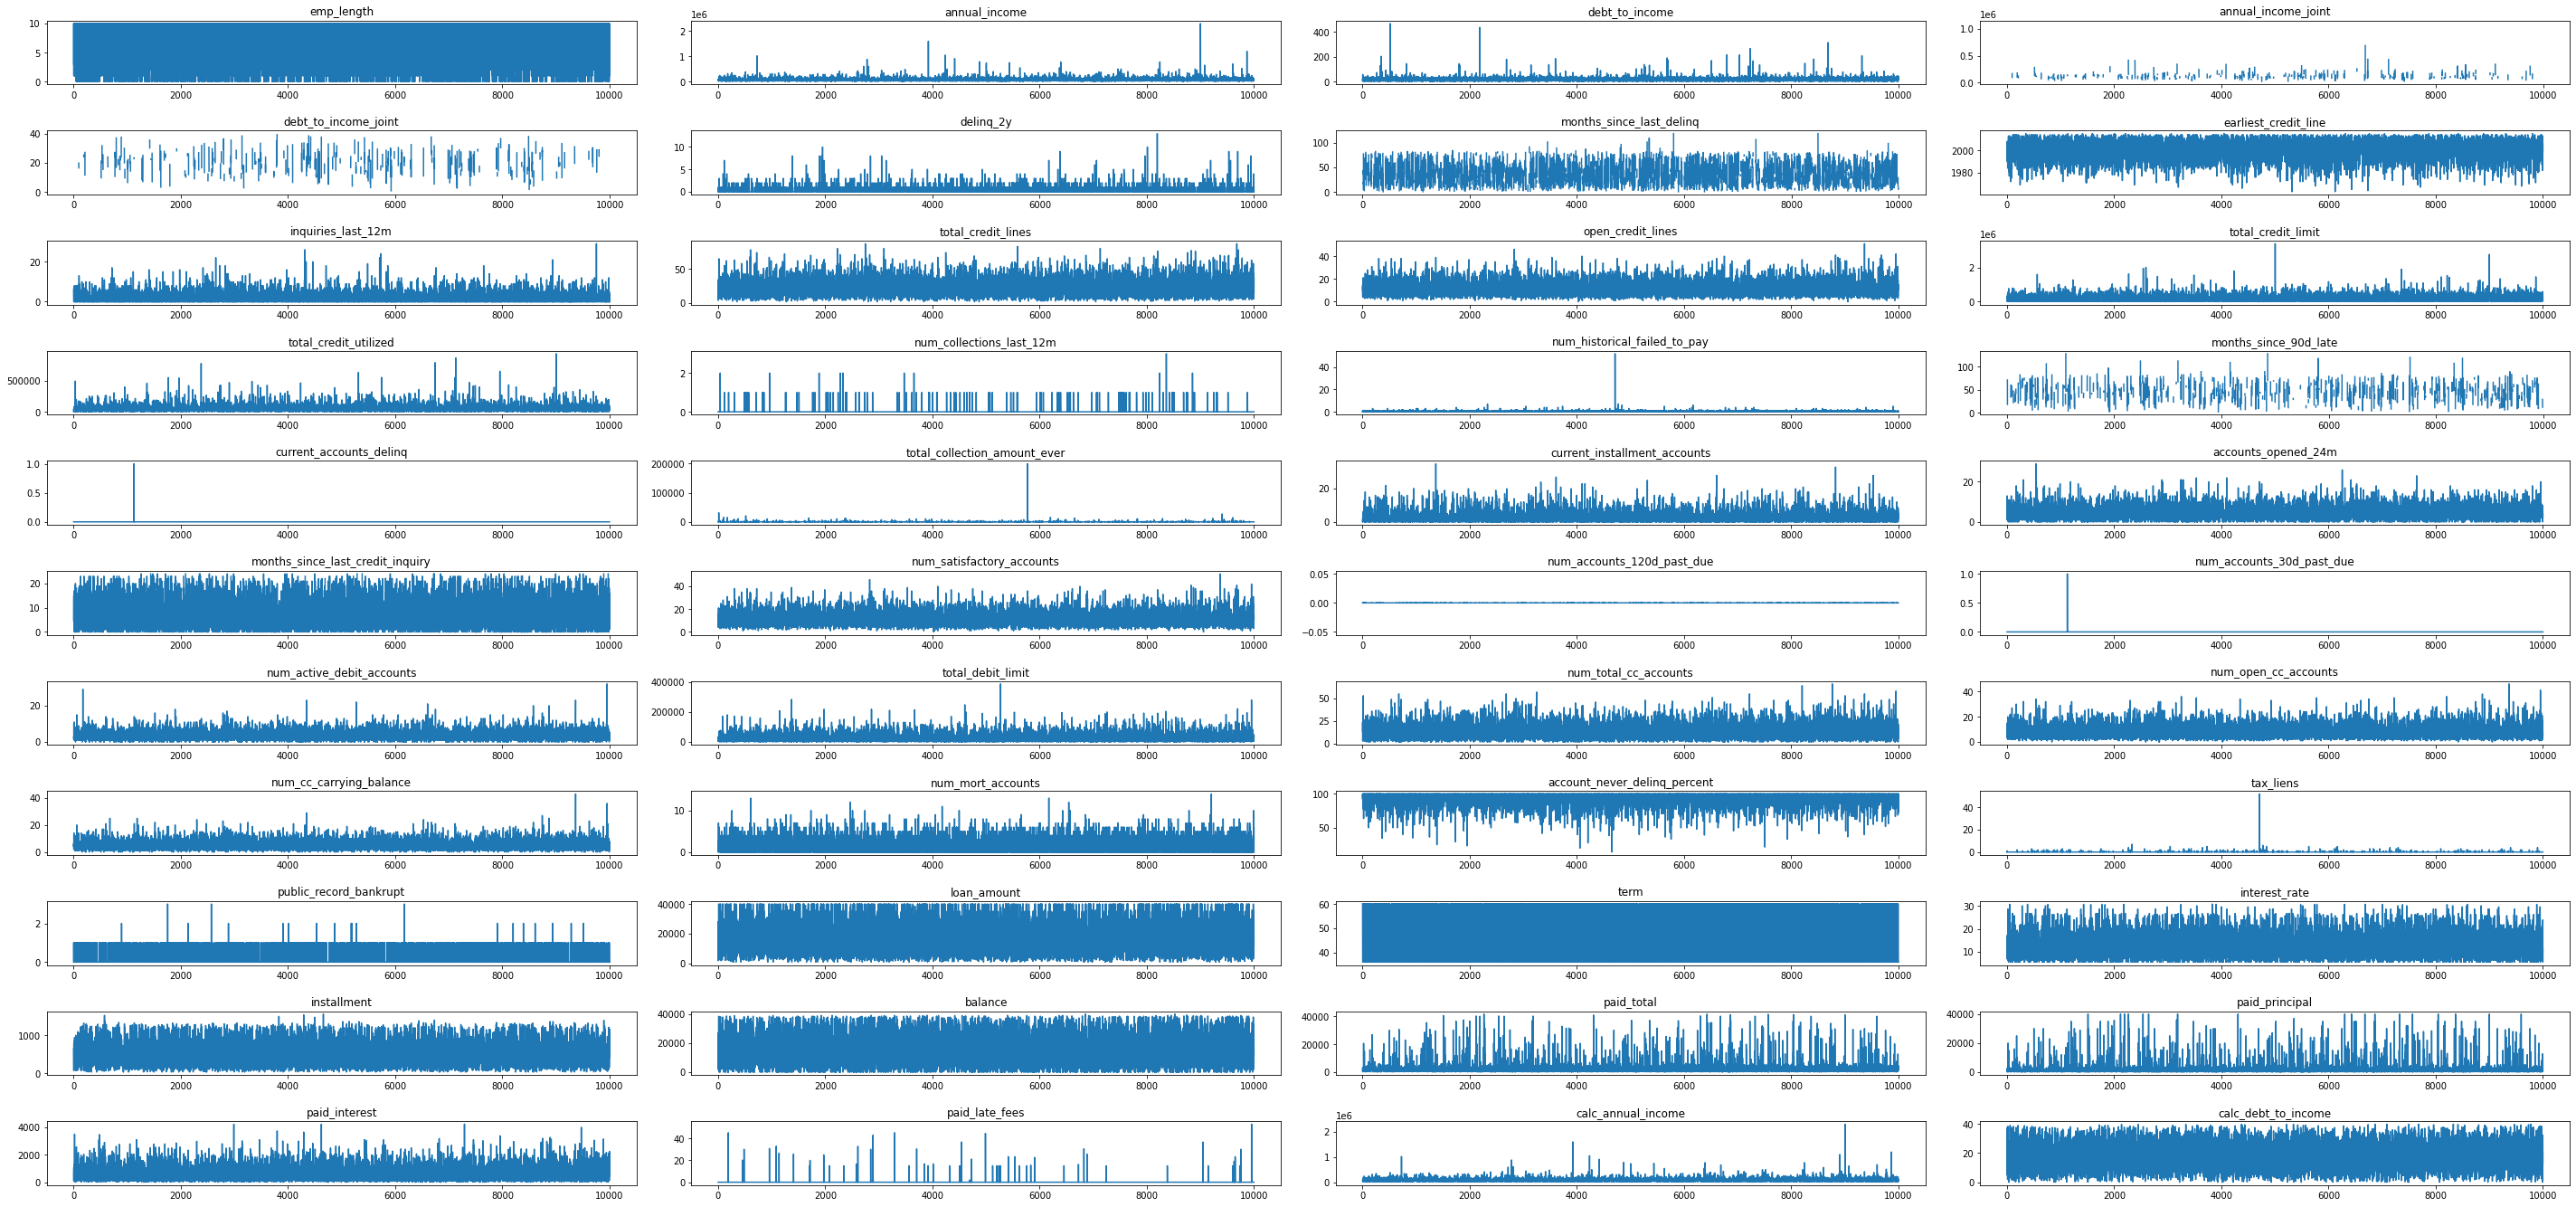

In [38]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=11, ncols=4)
fig.set_size_inches(40, 19)
fig.tight_layout(pad=3.0)
for i in range(11):
    for j in range(4):
        index = numeric_columns[4*i+j]
        axes[i, j].title.set_text(index)
        axes[i, j].plot(df[index])

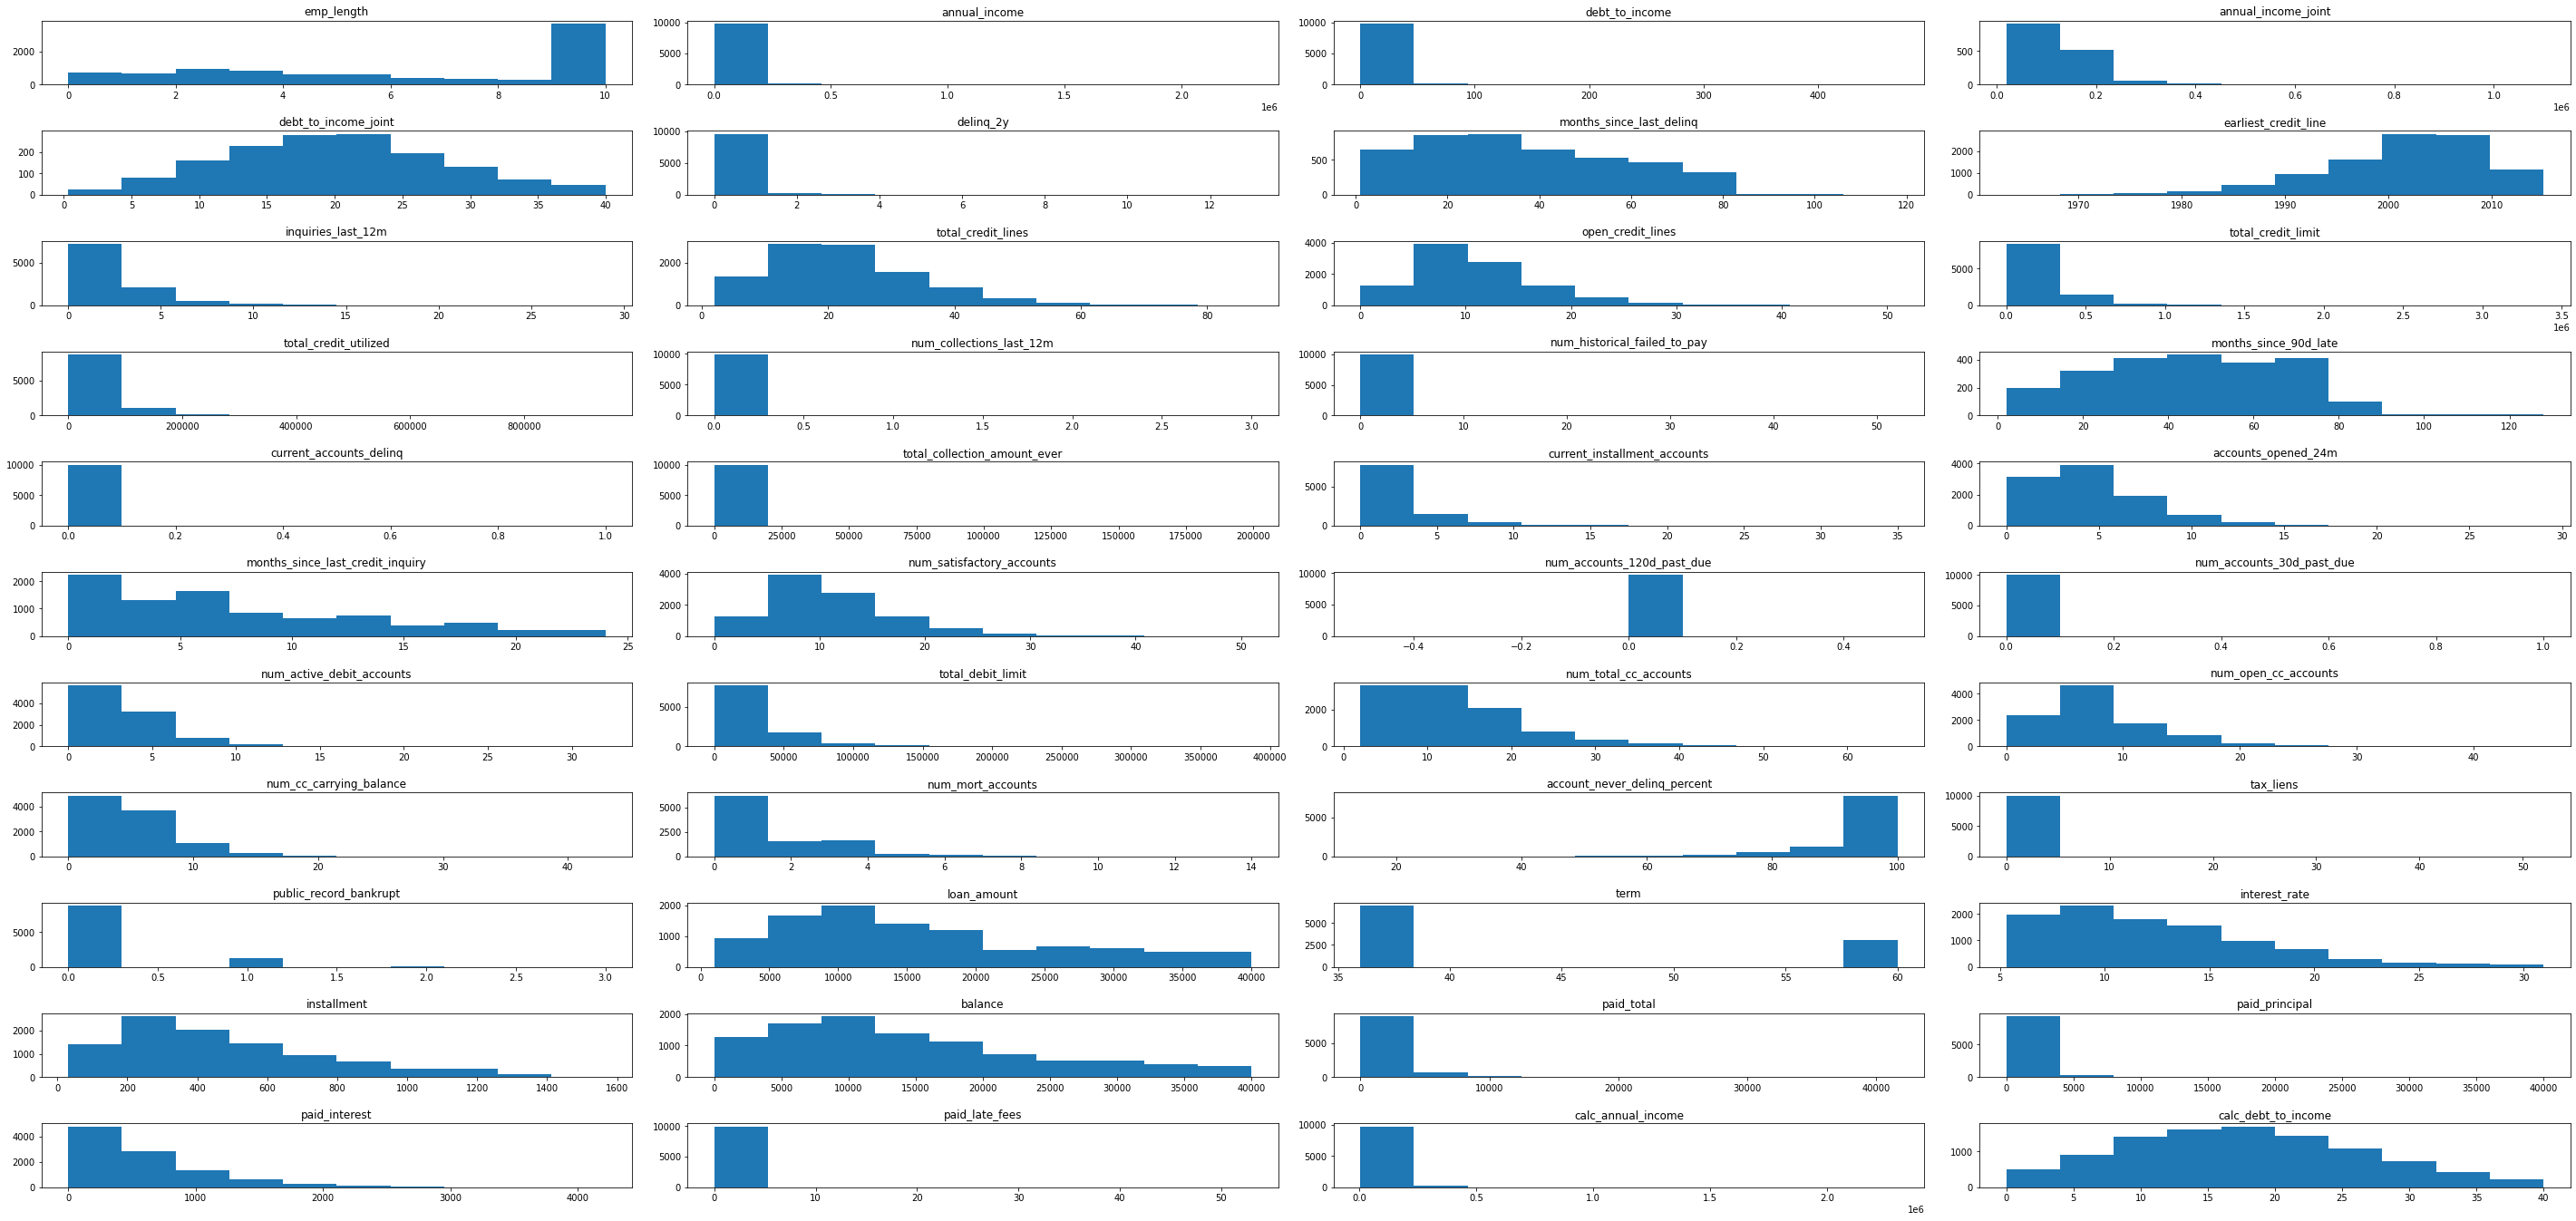

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=11, ncols=4)
fig.set_size_inches(40, 19)
fig.tight_layout(pad=3.0)
for i in range(11):
    for j in range(4):
        index = numeric_columns[4*i+j]
        axes[i, j].title.set_text(index)
        axes[i, j].hist(df[index])

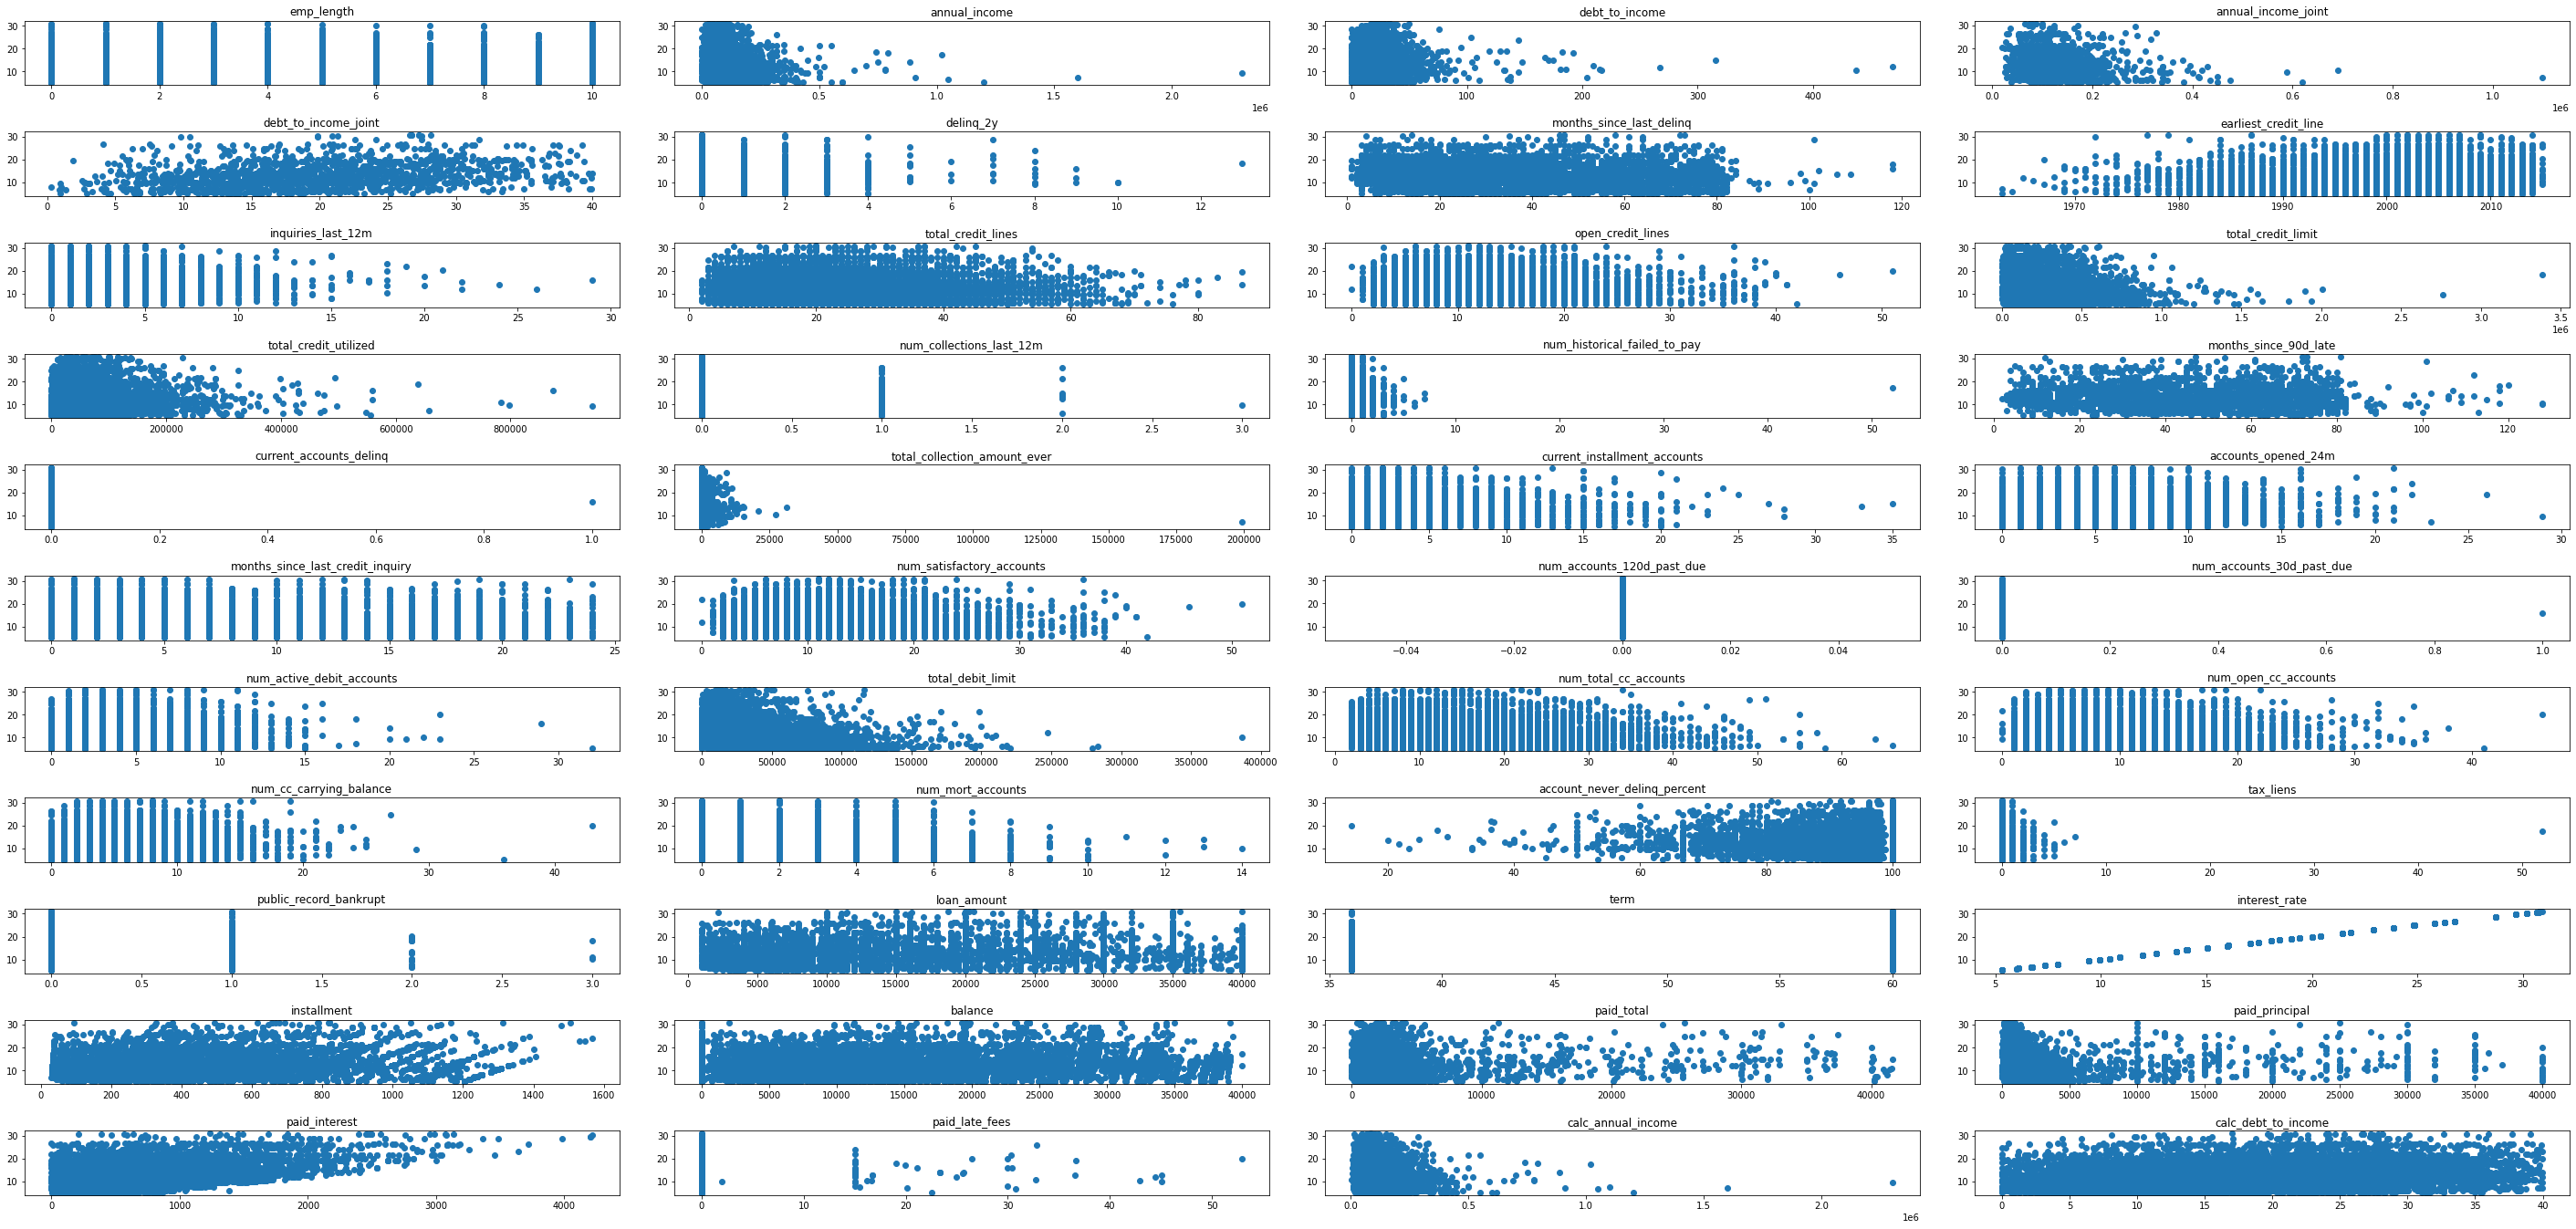

In [40]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=11, ncols=4)
fig.set_size_inches(40, 19)
fig.tight_layout(pad=3.0)
for i in range(11):
    for j in range(4):
        index = numeric_columns[4*i+j]
        axes[i, j].title.set_text(index)
        axes[i, j].scatter(df[index], df['interest_rate'])

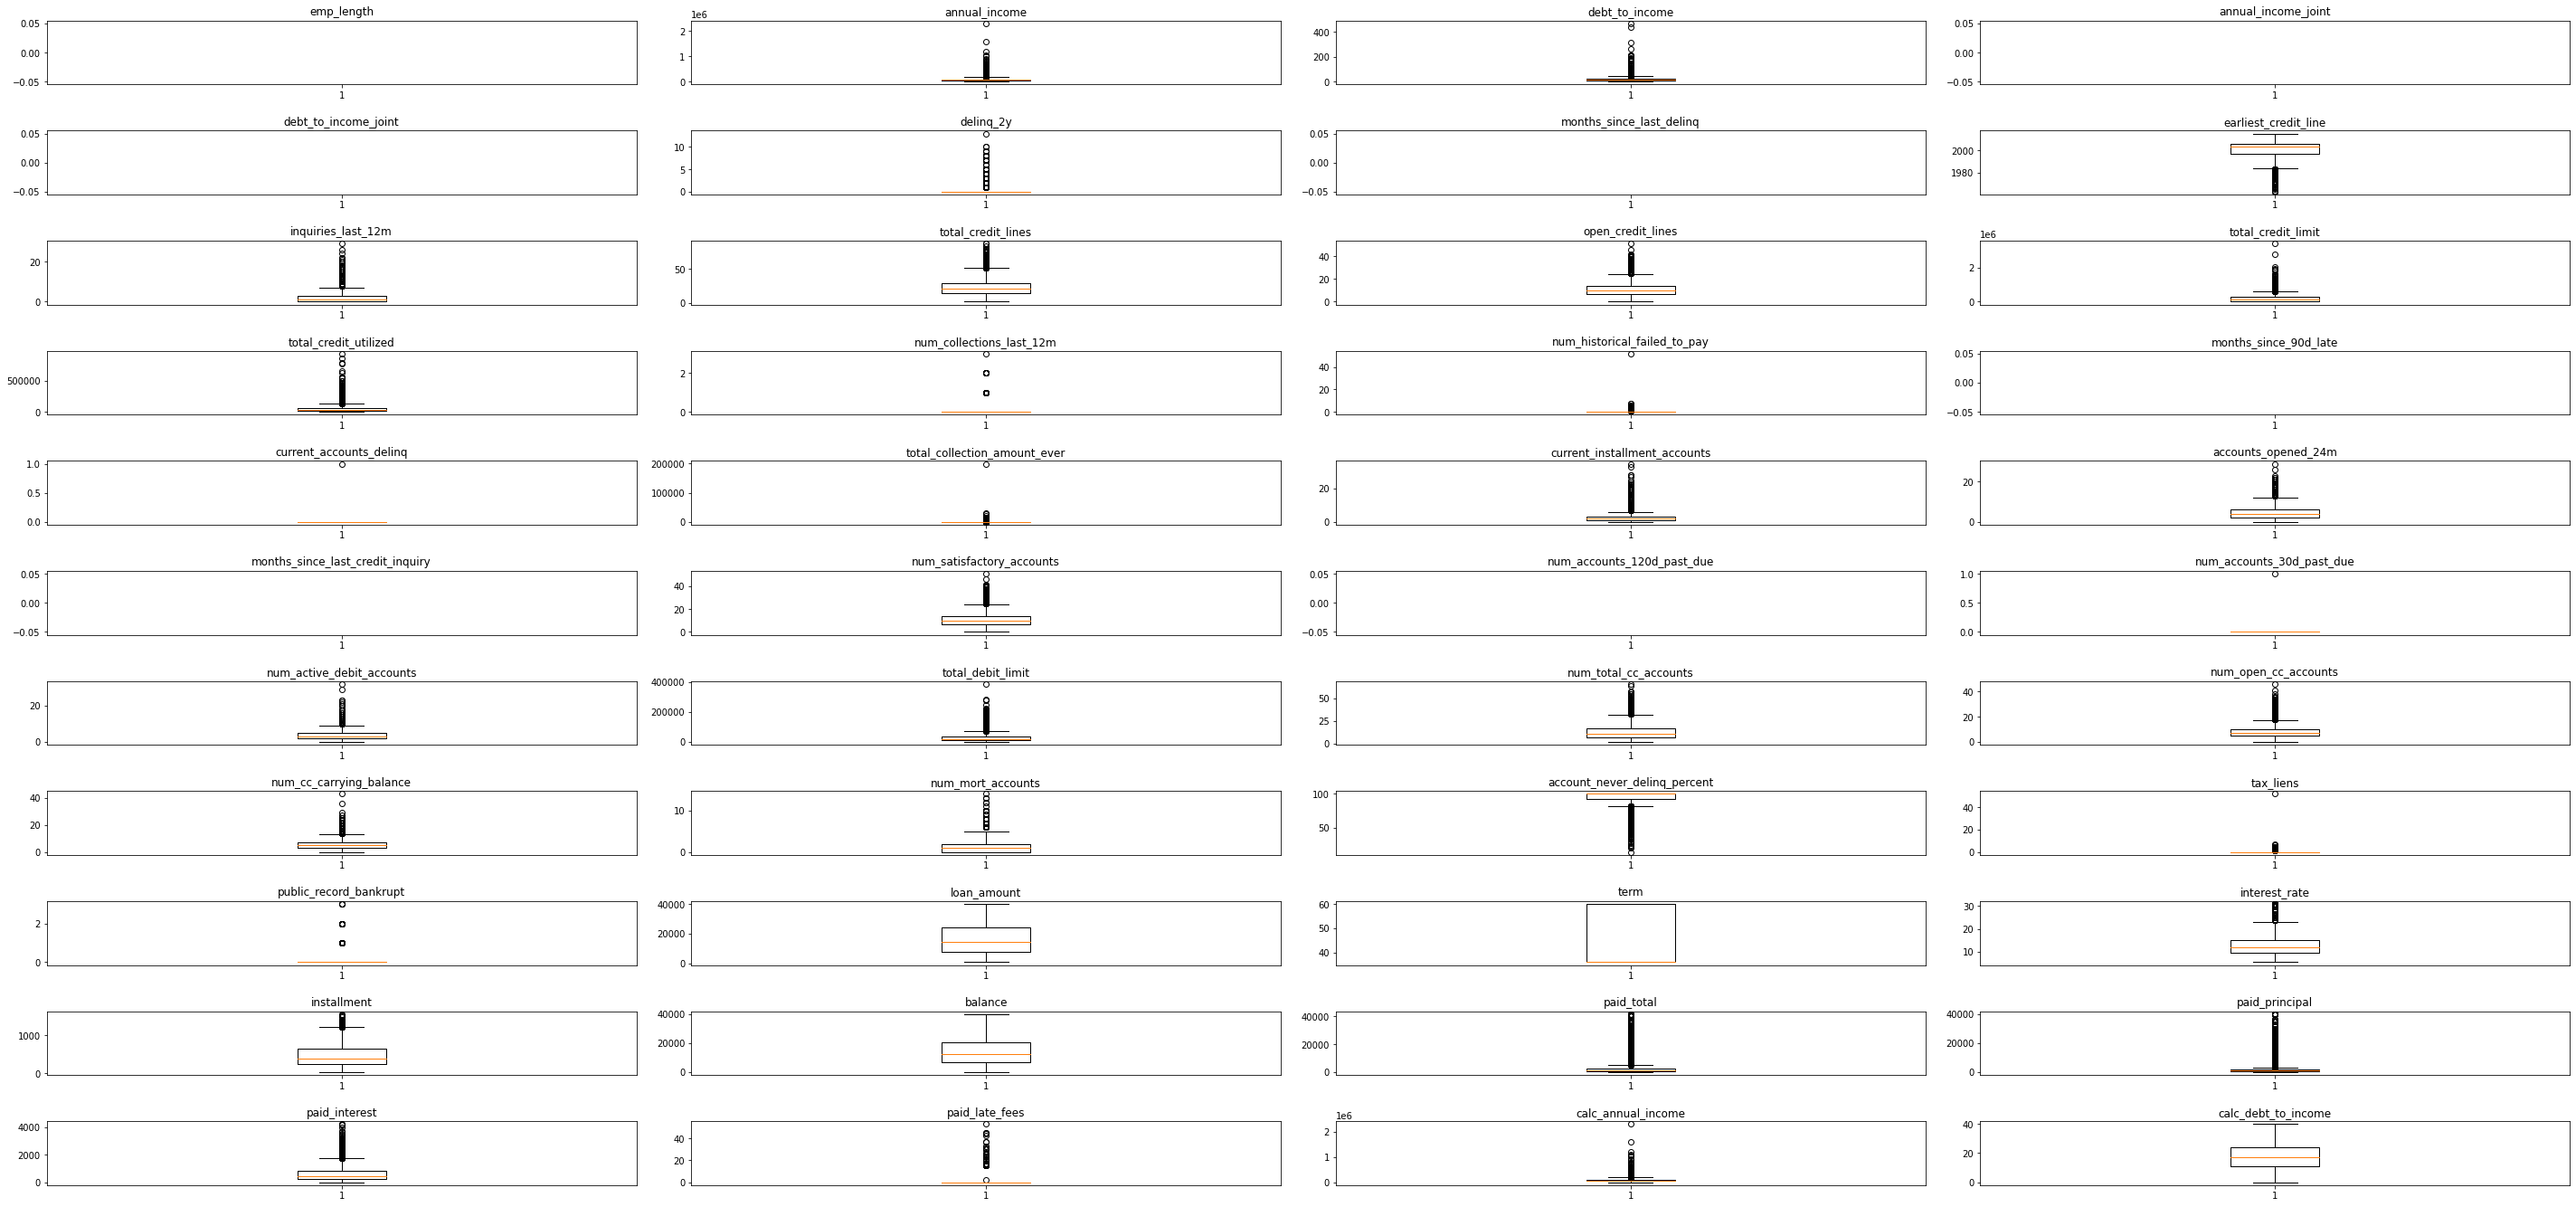

In [41]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=11, ncols=4)
fig.set_size_inches(40, 19)
fig.tight_layout(pad=3.0)
for i in range(11):
    for j in range(4):
        index = numeric_columns[4*i+j]
        axes[i, j].title.set_text(index)
        axes[i, j].boxplot(df[index])

## 4. Prediction Problem

### 4.1 Output Variable: interest_rate

In [42]:
unique_interest = df["interest_rate"].unique()
len(unique_interest)

58

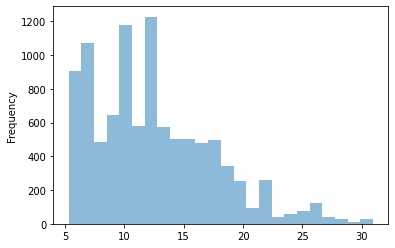

In [43]:
ax = df['interest_rate'].plot.hist(bins=24, alpha=0.5)

<AxesSubplot:>

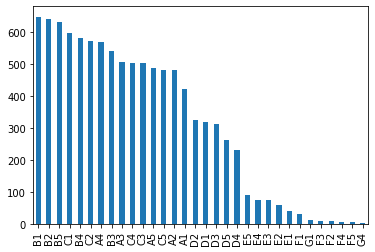

In [44]:
df['sub_grade'].value_counts().plot(kind='bar')

<AxesSubplot:>

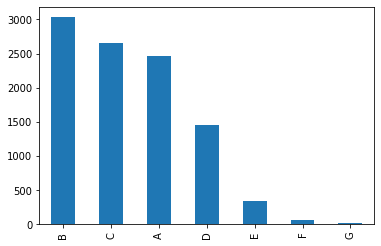

In [45]:
df['grade'].value_counts().plot(kind='bar')

In [46]:
desired_columns = ["grade", "sub_grade", "interest_rate"]
_df = df[desired_columns]
_df = _df.drop_duplicates(ignore_index=True)
_df = _df.sort_values(by=desired_columns, ignore_index=True)
print(_df)

   grade sub_grade  interest_rate
0      A        A1           5.31
1      A        A1           5.32
2      A        A2           6.00
3      A        A2           6.07
4      A        A2           6.08
5      A        A3           6.71
6      A        A3           6.72
7      A        A4           7.34
8      A        A4           7.35
9      A        A5           7.96
10     A        A5           7.97
11     B        B1           9.43
12     B        B1           9.44
13     B        B2           9.92
14     B        B2           9.93
15     B        B3          10.41
16     B        B3          10.42
17     B        B4          10.90
18     B        B4          10.91
19     B        B5          11.98
20     B        B5          11.99
21     C        C1          12.61
22     C        C1          12.62
23     C        C2          13.58
24     C        C2          13.59
25     C        C3          14.07
26     C        C3          14.08
27     C        C4          15.04
28     C      

### 4.2 Split the dataset

In [47]:
train = df.sample(frac=0.8, random_state=42) 
test = df.drop(train.index)
Y_train = train["interest_rate"]
Y_train_alt = train["sub_grade"]
Y_test_alt = test["sub_grade"]
Y_test = test["interest_rate"]
X_train = train.drop(['interest_rate'], axis=1)
X_test = test.drop(['interest_rate'], axis=1)
print(X_train.shape, X_test.shape)

(8000, 57) (2000, 57)


### 4.3 Feature engineering

In this step, we will:
* Transform the categorical variables to numeric.
* Scale the variables with Min-Max Normalization
* Calculate the correlation between the variables and the "interest_rate"

In [48]:
_numeric_columns = X_train._get_numeric_data().columns
_categorical_columns = list(set(X_train.columns) - set(_numeric_columns))

for col in _categorical_columns:
    if col == "emp_title":
        continue
    LE = LabelEncoder()
    X_train[col] = LE.fit_transform(X_train[col])
    X_test[col] = LE.transform(X_test[col])

X_train = X_train.drop(['emp_title'], axis=1)
X_test = X_test.drop(['emp_title'], axis=1)

In [49]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train.to_numpy())
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

Y_train_scaled = scaler.fit_transform(Y_train.to_numpy().reshape(-1, 1))
Y_train_scaled = series = pd.Series(np.squeeze(Y_train_scaled)) 

X_test_scaled = scaler.fit_transform(X_test.to_numpy())
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

<AxesSubplot:>

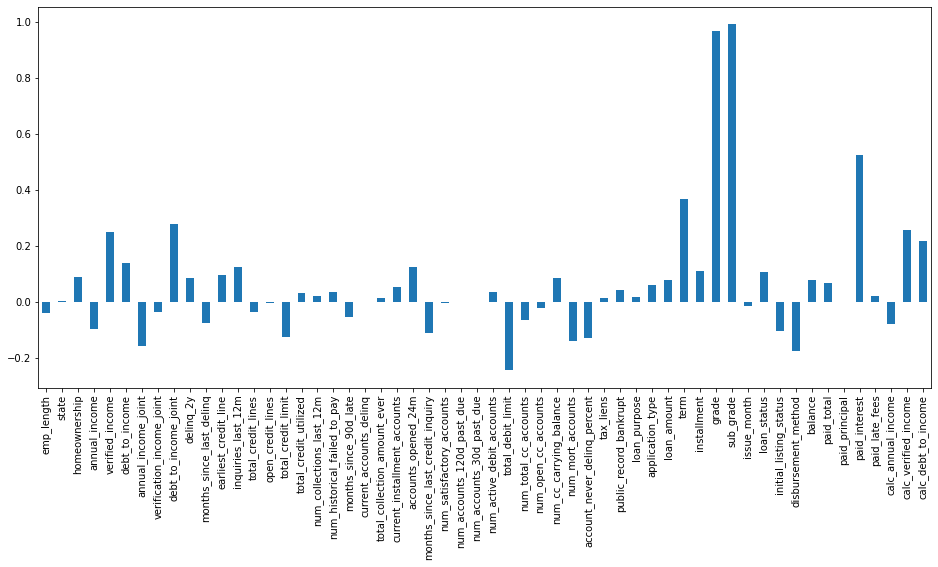

In [50]:
corrM = X_train_scaled.corrwith(Y_train_scaled)
corrM.plot(kind='bar', figsize=(16, 7))

In the graph above, we can see the correlation of the target variable with the variables of the test.  
**We will not use the grade and sub_grade variables because this will be consider cheating. Because, the grade/subgrade is calculated from interest_rate.**

In the following graphs, there are the variables with the higher positive/negative correlation with the target variable.

<AxesSubplot:>

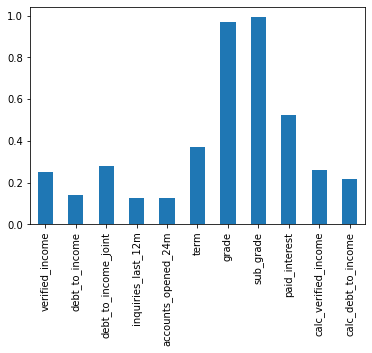

In [51]:
corrM[corrM>0.12].plot(kind='bar')

<AxesSubplot:>

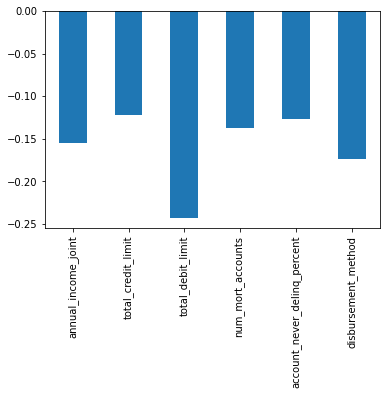

In [52]:
corrM[corrM<-0.12].plot(kind='bar')

In [53]:
desired_cols = list(corrM[corrM>0.12].index) + list(corrM[corrM<-0.12].index)
desired_cols.remove("verified_income")
desired_cols.remove("annual_income_joint")
desired_cols.remove("debt_to_income")
desired_cols.remove("debt_to_income_joint")
desired_cols.remove("grade")
desired_cols.remove("sub_grade")
desired_cols.append("calc_annual_income")
desired_cols

['inquiries_last_12m',
 'accounts_opened_24m',
 'term',
 'paid_interest',
 'calc_verified_income',
 'calc_debt_to_income',
 'total_credit_limit',
 'total_debit_limit',
 'num_mort_accounts',
 'account_never_delinq_percent',
 'disbursement_method',
 'calc_annual_income']

### 4.4 Model Training & Evaluation

In [54]:
X_train_scaled[desired_cols].isnull().sum().sum()
X_train_scaled = X_train_scaled[desired_cols]
X_test_scaled = X_test_scaled[desired_cols]

### 4.5.1 Baseline

Our baseline is the result of always guessing the mean of the train target variable. Any successful model must be better than guessing the mean value.

In [55]:
print("The baseline MSE error is {:.4f}.".format(mean_squared_error(Y_test, [Y_train.mean()] * len(Y_test))))

The baseline MSE error is 23.4864.


### 4.5.2 SVR Algorithm

In [56]:
regr = svm.SVR()
regr.fit(X_train_scaled, Y_train)
y_predicted = regr.predict(X_test_scaled)
mean_squared_error(Y_test, y_predicted)

14.388061152248246

This is the best attempt with 14.3880 in comparison with 23.4864.

### 4.5.3 BayesianRidge

In [57]:
regr = BayesianRidge()
regr.fit(X_train_scaled, Y_train)
y_predicted = regr.predict(X_test_scaled)
mean_squared_error(Y_test, y_predicted)

15.03163147352784

### 4.5.4 LinearRegression

In [58]:
regr = LinearRegression()
regr.fit(X_train_scaled, Y_train)
y_predicted = regr.predict(X_test_scaled)
mean_squared_error(Y_test, y_predicted)

15.079364723590755

### 4.5.5 As Classification problem

In [59]:
clf = svm.SVC(gamma=10, kernel='rbf', C=1, coef0=0.0)
clf.fit(X_train_scaled, Y_train_alt)
y_predicted = clf.predict(X_test_scaled)

In [60]:
_train = df[['interest_rate','sub_grade']].value_counts(dropna=False)
for val_index in range(len(y_predicted)):
    _val = _train[:, y_predicted[val_index]].index.values.mean()
    y_predicted[val_index] = _val
    
mean_squared_error(Y_test, y_predicted)

21.310521331944443

In [61]:
mean_squared_error(Y_test, y_predicted)

21.310521331944443

### 4.5.6 Bayes

In [62]:
gnb = GaussianNB()
y_predicted = gnb.fit(X_train_scaled, Y_train_alt).predict(X_test_scaled)

In [63]:
_train = df[['interest_rate','sub_grade']].value_counts(dropna=False)
for val_index in range(len(y_predicted)):
    _val = _train[:, y_predicted[val_index]].index.values.mean()
    y_predicted[val_index] = _val
    
mean_squared_error(Y_test, y_predicted)

/home/tutten/VirtualEnvironments/py37_venv/lib/python3.7/site-packages/sklearn/metrics/_regression.py:96: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


130.62263085

## 5. Comments

There are some points worth mentioning:
* The dataset contains only successful deals and not unsuccessful deals. So, you can not use it to predict if someone will get a loan or not.
* The dataset includes some information after the deal is made. We can not use the extra information to predict the interest rate if we want to predict the interest rate in a successful deal. In this case, the cases that the applicant refused the loan because the higher interest rate is not included.
* If the application was joint application, then the joint income, debt, etc was used for the calculations.
* Many variables have a lot of outlier, or NaN values.
* There is low correlation between interest rate and the other variables.


Possible Directions:  
1) Regression problem  
2) Classification problem with subset - check if all subset have same value for interest  

## 6. Improvements

For future development:
* More models/algorithms
* Parameter Models Optimization.
* Feature Engineering ALgorithms like PCA.